In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [22]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [23]:
df.shape

(21, 2)

In [24]:
df[df.duplicated()].shape

(0, 2)

In [25]:
df=df.rename({'Delivery Time':'DT'},axis=1)

In [26]:
df.head()

,DT,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [27]:
df=df.rename({'Sorting Time':'ST'},axis=1)

In [28]:
df.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:>

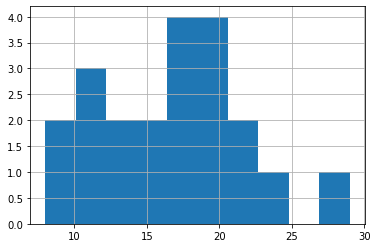

In [29]:
df['DT'].hist()

<AxesSubplot:>

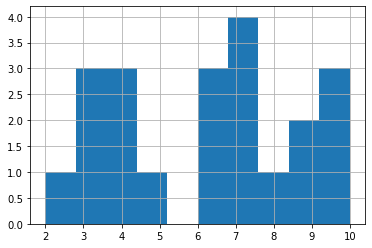

In [30]:
df['ST'].hist()

<AxesSubplot:>

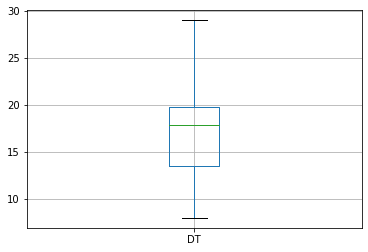

In [31]:
df.boxplot(column='DT')

{'whiskers': [<matplotlib.lines.Line2D at 0x24d70be0610>,
 'caps': [<matplotlib.lines.Line2D at 0x24d70be0cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d70be02b0>],
 'medians': [<matplotlib.lines.Line2D at 0x24d70bed3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d70bed730>],
 'means': []}

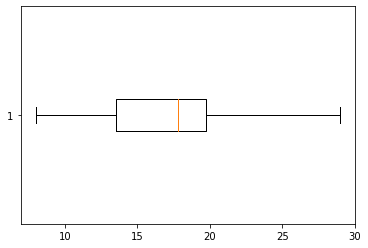

In [32]:
plt.boxplot(df['DT'],vert=False)

<AxesSubplot:>

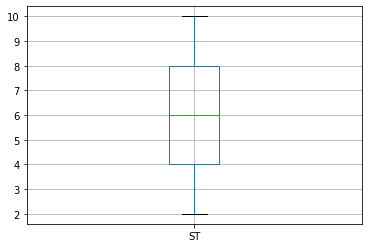

In [33]:
df.boxplot(column='ST')

{'whiskers': [<matplotlib.lines.Line2D at 0x24d70ca17f0>,
 'caps': [<matplotlib.lines.Line2D at 0x24d70ca1eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d70ca1490>],
 'medians': [<matplotlib.lines.Line2D at 0x24d70cad5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d70cad910>],
 'means': []}

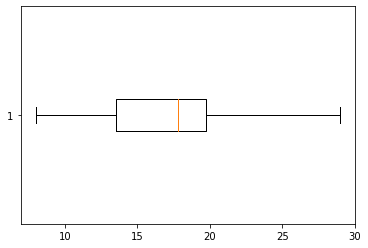

In [35]:
plt.boxplot(df['DT'],vert=False)

In [36]:
#Model Building

In [49]:
import statsmodels.formula.api as smf
model=smf.ols('DT~ST',data=df).fit()

<AxesSubplot:xlabel='ST', ylabel='DT'>

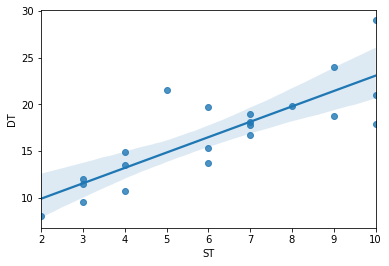

In [50]:
sns.regplot(x='ST',y='DT',data=df)

In [51]:
df.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


In [52]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [53]:
print(model.tvalues,'\n',model.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [54]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           3.98e-06
Time:                        12:47:24   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
DT             0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data=scaler.fit_transform(df)

In [46]:
data=pd.DataFrame(data,index=df.index,columns=df.columns)
data.head()

,DT,ST
0,0.849867,1.535625
1,-0.664490,-0.882984
2,0.597474,-0.076781
3,1.455610,1.132523
4,2.465181,1.535625


In [55]:
new_model=smf.ols('DT~ST',data=data).fit()

In [56]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           3.98e-06
Time:                        12:53:57   Log-Likelihood:                -17.759
No. Observations:                  21   AIC:                             39.52
Df Residuals:                      19   BIC:                             41.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.274e-16      0.129  -4.08e-15      1.000      -0.271       0.271
ST             0.8260      0.129      6.387      0.000       0.555       1.097
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
df['log_ST']=np.log(df['ST'])
df['log_DT']=np.log(df['DT'])
df.head()



,DT,ST,log_ST,log_DT
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296


In [64]:
model1=smf.ols('log_DT~log_ST',data=df).fit()

In [65]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_DT   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           1.60e-07
Time:                        12:59:17   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
log_ST         0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
df['sq_ST']=np.sqrt(df['ST'])
df['sq_DT']=np.sqrt(df['DT'])
df.head()

,DT,ST,log_ST,log_DT,sq_ST,sq_DT
0,21.00,10,2.302585,3.044522,3.162278,4.582576
1,13.50,4,1.386294,2.602690,2.000000,3.674235
2,19.75,6,1.791759,2.983153,2.449490,4.444097
3,24.00,9,2.197225,3.178054,3.000000,4.898979
4,29.00,10,2.302585,3.367296,3.162278,5.385165


In [67]:
model2=smf.ols('sq_DT~sq_ST',data=df).fit()

In [68]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sq_DT   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           8.48e-07
Time:                        13:00:28   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6135      0.349      4.628      0.000       0.884       2.343
sq_ST          1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
df['exp_ST']=np.exp(-df['ST'])
df['exp_DT']=np.exp(-df['DT'])
df.head()

,DT,ST,log_ST,log_DT,sq_ST,sq_DT,exp_ST,exp_DT
0,21.00,10,2.302585,3.044522,3.162278,4.582576,0.000045,7.582560e-10
1,13.50,4,1.386294,2.602690,2.000000,3.674235,0.018316,1.370959e-06
2,19.75,6,1.791759,2.983153,2.449490,4.444097,0.002479,2.646574e-09
3,24.00,9,2.197225,3.178054,3.000000,4.898979,0.000123,3.775135e-11
4,29.00,10,2.302585,3.367296,3.162278,5.385165,0.000045,2.543666e-13


In [74]:
model3=smf.ols('exp_DT~exp_ST',data=df).fit()

In [75]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 exp_DT   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     78.77
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           3.47e-08
Time:                        13:12:30   Log-Likelihood:                 187.70
No. Observations:                  21   AIC:                            -371.4
Df Residuals:                      19   BIC:                            -369.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.365e-05   8.29e-06     -1.646      0.116    -3.1e-05    3.71e-06
exp_ST         0.0021      0.000      8.875      0.000       0.002       0.003
==============================================================================
Omnibus:                       10.040   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.171
Skew:                          -1.061   Prob(JB):                       0.0168
Kurtosis:                       5.200   Cond. No.                         31.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
df['sq_inv_ST']=1/(df['ST']*df['ST'])
df['sq_inv_DT']=1/(df['DT']*df['DT'])
df.head()

,DT,ST,log_ST,log_DT,sq_ST,sq_DT,exp_ST,exp_DT,sq_inv_ST,sq_inv_DT
0,21.00,10,2.302585,3.044522,3.162278,4.582576,0.000045,7.582560e-10,0.010000,0.002268
1,13.50,4,1.386294,2.602690,2.000000,3.674235,0.018316,1.370959e-06,0.062500,0.005487
2,19.75,6,1.791759,2.983153,2.449490,4.444097,0.002479,2.646574e-09,0.027778,0.002564
3,24.00,9,2.197225,3.178054,3.000000,4.898979,0.000123,3.775135e-11,0.012346,0.001736
4,29.00,10,2.302585,3.367296,3.162278,5.385165,0.000045,2.543666e-13,0.010000,0.001189


In [78]:
model4=smf.ols('sq_inv_DT~sq_inv_ST',data=df).fit()

In [79]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sq_inv_DT   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     121.0
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           1.11e-09
Time:                        13:15:07   Log-Likelihood:                 110.29
No. Observations:                  21   AIC:                            -216.6
Df Residuals:                      19   BIC:                            -214.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0019      0.000      4.949      0.000       0.001       0.003
sq_inv_ST      0.0572      0.005     11.000      0.000       0.046       0.068
==============================================================================
Omnibus:                        5.921   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                3.817
Skew:                           0.996   Prob(JB):                        0.148
Kurtosis:                       3.631   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
df['fourth_inv_ST']=1/(df['ST']*df['ST']*df['ST']*df['ST'])
df['fourth_inv_DT']=1/(df['DT']*df['DT']*df['DT']*df['DT'])
df.head()

,DT,ST,log_ST,log_DT,sq_ST,sq_DT,exp_ST,exp_DT,sq_inv_ST,sq_inv_DT,fourth_inv_ST,fourth_inv_DT
0,21.00,10,2.302585,3.044522,3.162278,4.582576,0.000045,7.582560e-10,0.010000,0.002268,0.000100,0.000005
1,13.50,4,1.386294,2.602690,2.000000,3.674235,0.018316,1.370959e-06,0.062500,0.005487,0.003906,0.000030
2,19.75,6,1.791759,2.983153,2.449490,4.444097,0.002479,2.646574e-09,0.027778,0.002564,0.000772,0.000007
3,24.00,9,2.197225,3.178054,3.000000,4.898979,0.000123,3.775135e-11,0.012346,0.001736,0.000152,0.000003
4,29.00,10,2.302585,3.367296,3.162278,5.385165,0.000045,2.543666e-13,0.010000,0.001189,0.000100,0.000001


In [81]:
model5=smf.ols('fourth_inv_DT~fourth_inv_ST',data=df).fit()

In [82]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fourth_inv_DT   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     145.5
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           2.38e-10
Time:                        13:17:21   Log-Likelihood:                 198.80
No. Observations:                  21   AIC:                            -393.6
Df Residuals:                      19   BIC:                            -391.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.296e-05   4.66e-06      2.782      0.012    3.21e-06    2.27e-05
fourth_inv_ST     0.0039      0.000     12.061      0.000       0.003       0.005
==============================================================================
Omnibus:                       26.301   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.831
Skew:                           2.392   Prob(JB):                     3.70e-09
Kurtosis:                       7.636   Cond. No.                         74.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
pred_data=pd.DataFrame(df)
model5.predict(pred_data)

0     0.000013
1     0.000028
2     0.000016
3     0.000014
4     0.000013
5     0.000016
6     0.000015
7     0.000061
8     0.000013
9     0.000014
10    0.000014
11    0.000028
12    0.000015
13    0.000061
14    0.000061
15    0.000028
16    0.000016
17    0.000015
18    0.000255
19    0.000015
20    0.000019
dtype: float64